In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import modules.hack as Hack
import re

from collections import Counter
from textblob import TextBlob
from typing import List

# 1. Đọc dữ liệu

In [3]:
reviews = pd.read_csv("./data/reviews.csv")

In [4]:
Counter(reviews['label'])

Counter({1: 260555, 0: 13840, -1: 3764})

# 2. Xóa các mẫu chứa url

In [5]:
reviews['contain_url'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.containsURL(comment.lower()) else 0)

In [6]:
reviews

,raw_comment,label,contain_url
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,0
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,0
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,0
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,0
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,0
...,...,...,...
278154,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,0
278155,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,0
278156,Cũng ổn nhìn hay hay,0,0
278157,"nhỏ xíu , ship 2 tuần , thất vọng",1,0


In [7]:
reviews = reviews[reviews['contain_url'] == 0]
reviews = reviews.drop(columns=['contain_url']).reset_index(drop=True)

In [8]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
277584,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
277585,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
277586,Cũng ổn nhìn hay hay,0
277587,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 3. Xóa các mẫu chỉ chứa mỗi comment là `ok`

In [9]:
reviews = reviews.loc[reviews['raw_comment'].str.lower() != "ok"]
reviews = reviews.reset_index(drop=True)

In [10]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
274799,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
274800,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
274801,Cũng ổn nhìn hay hay,0
274802,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 4. Xóa các mẫu mà chữ IN HOA chiếm quá 50% độ dài của comment (khả năng cao là quảng cáo)

In [11]:
reviews['contain_adv'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.containAdvertisement(comment) else 0)

In [12]:
reviews

,raw_comment,label,contain_adv
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,0
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,0
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,0
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,0
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,0
...,...,...,...
274799,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,0
274800,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,0
274801,Cũng ổn nhìn hay hay,0,0
274802,"nhỏ xíu , ship 2 tuần , thất vọng",1,0


In [13]:
reviews = reviews[reviews['contain_adv'] == 0]
reviews = reviews.drop(columns=['contain_adv']).reset_index(drop=True)

In [14]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
273832,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
273833,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
273834,Cũng ổn nhìn hay hay,0
273835,"nhỏ xíu , ship 2 tuần , thất vọng",1


# 5. Xóa các dòng không phải tiếng việt

In [24]:
vietnamese_syllables = Hack.loadVietnameseSyllables()

In [25]:
reviews['language'] = reviews['raw_comment'].apply(lambda comment: 1 if Hack.isVietnamese(comment, vietnamese_syllables) else 0)

In [26]:
reviews = reviews[reviews['language'] == 1]
reviews = reviews.drop(columns=['language']).reset_index(drop=True)

In [27]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1
...,...,...
250417,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1
250418,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
250419,Cũng ổn nhìn hay hay,0
250420,"nhỏ xíu , ship 2 tuần , thất vọng",1


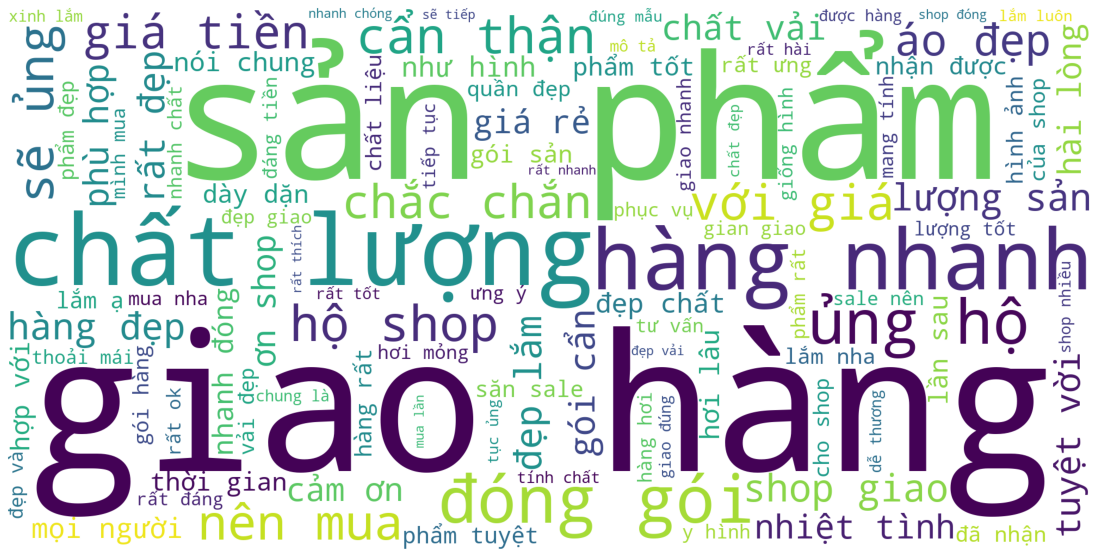

In [30]:
Hack.drawWordCloud(Hack.convertToOneString(reviews['raw_comment']))

In [82]:
phrases = ['hợp với', 'nhận được', 'rất hài', 'thời gian', 'phẩm tốt', 'tục ủng', 'mọi người', 'lượng tốt', 'shop nhiều', 'y hình', 'chất liệu', 'lắm luôn', 'nhanh đóng', 'đóng gói sản phẩm', 'hình ảnh', 'mang tính', 'shop giao', 'tư vấn', 'lắm ạ', 'giá tiền', 'giá cả', 'hàng rất', 'rất đáng', 'hộ shop', 'gói cẩn', 'sẽ tiếp', 'phù hợp', 'chất lượng', 'đã nhận', 'shop đóng', 'phẩm tuyệt', 'cho shop', 'mình mua', 'mua nha', 'săn sale', 'được hàng']

phrases = list(set(phrases))

phrases = dict(zip(phrase, np.ones(len(phrases), dtype=int)))

In [83]:
tmp = reviews.copy()

In [84]:
tmp['phrase'] = tmp['raw_comment'].apply(lambda comment: Hack.expandPhrase(comment, phrases))

In [85]:
tmp

,raw_comment,label,phrase
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,phù_hợp_với_giá giao_hàng_nhanh_phục giao_hàng...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,phẩm_y_hình_và đẹp_lắm_ạ_săn với_giá_sale
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,với_giá_đánh bạn_chất_lượng_quá
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa_nhận_được_hàng nha_mọi_người_ví tay_đóng_g...
...,...,...,...
250417,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,1,
250418,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,với_giá_tiền gian_giao_hàng_dài
250419,Cũng ổn nhìn hay hay,0,
250420,"nhỏ xíu , ship 2 tuần , thất vọng",1,


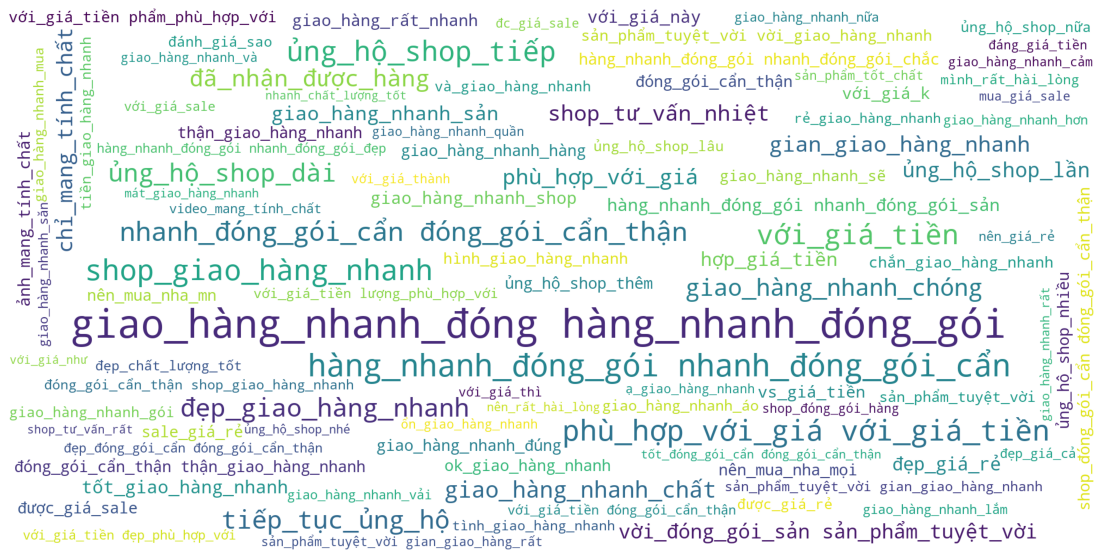

In [86]:
Hack.drawWordCloud(Hack.convertToOneString(tmp['phrase']))

In [22]:
boost_words = ["chắc chắn", "cảm ơn", "ủng hộ", "hơi mỏng", "hài lòng", "tuyệt vời", "thoải mái", "đẹp lắm", "ưng ý", "rất ok", "giao hàng nhanh chóng", "giao hàng nhanh", "nên mua", "đẹp chất lượng tốt", "đóng gói cẩn thận", "phù hợp với giá", "giao hàng rất nhanh", "tiếp tục ủng hộ", "ủng hộ shop", "tư vấn nhiệt tình", "tư vấn rất nhiệt tình", "đẹp giá rẻ", "chất lượng tốt", "đáng giá tiền"]

In [23]:
stop_words = ["sẽ", "shop", "với"]